In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AvgPool2D, Dropout, Flatten, Dense

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.image import imread

2023-12-08 14:55:24.827727: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(X_train, Y_train), (X_validate, Y_validate) = mnist.load_data()
X_train = X_train / 255.0
X_validate = X_validate / 255.0

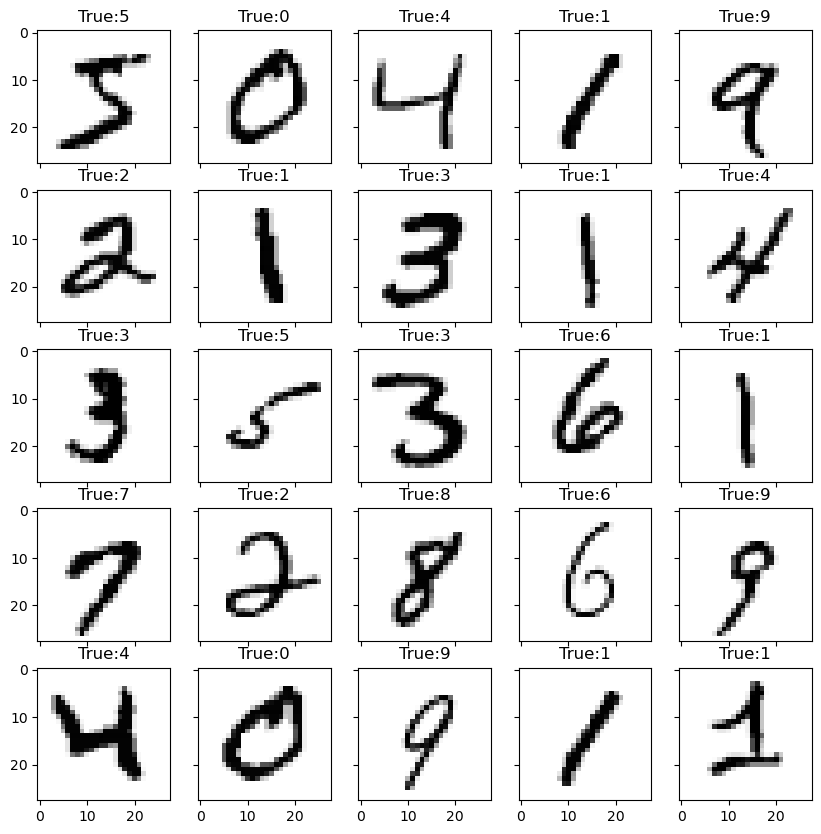

In [3]:
k = 5
fg, ax = plt.subplots(k, k, figsize=(2*k,2*k), sharex=True, sharey=True)
j = 0
for i1 in range(k):
    for i2 in range(k):
        ax[i1,i2].imshow(X_train[j], cmap='Greys')
        ax[i1,i2].set_title(f'True:{Y_train[j]}')
        j += 1

In [4]:
n_train = Y_train.size
Y_train_flat = np.zeros((n_train, 10))
for j in range(n_train):
    Y_train_flat[j, Y_train[j]] = 1.0

In [5]:
n_validate = Y_validate.size
Y_validate_flat = np.zeros((n_validate, 10))
for j in range(n_validate):
    Y_validate_flat[j, Y_validate[j]] = 1.0

In [15]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D())
model.add(Conv2D(16, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(120, activation="relu"))
model.add(Dense(84, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.build(input_shape=(None, 28, 28, 1))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 8)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 120)              

In [7]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
model.fit(
    x=X_train, 
    y=Y_train_flat, 
    batch_size=128, 
    epochs=10, 
    validation_data=(X_validate, Y_validate_flat)
)

Epoch 1/10
469/469 [==============================] - 10s 18ms/step - loss: 0.3097 - accuracy: 0.9083 - val_loss: 0.0909 - val_accuracy: 0.9712
Epoch 2/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0804 - accuracy: 0.9754 - val_loss: 0.0522 - val_accuracy: 0.9838
Epoch 3/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0571 - accuracy: 0.9824 - val_loss: 0.0435 - val_accuracy: 0.9857
Epoch 4/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0441 - accuracy: 0.9861 - val_loss: 0.0376 - val_accuracy: 0.9871
Epoch 5/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0367 - accuracy: 0.9883 - val_loss: 0.0449 - val_accuracy: 0.9854
Epoch 6/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0318 - accuracy: 0.9894 - val_loss: 0.0392 - val_accuracy: 0.9868
Epoch 7/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0287 - accuracy: 0.9908 - val_loss: 0.0300 - val_accuracy: 0.989

In [9]:
model.save('mnist3.mdl')

INFO:tensorflow:Assets written to: mnist3.mdl/assets


INFO:tensorflow:Assets written to: mnist3.mdl/assets


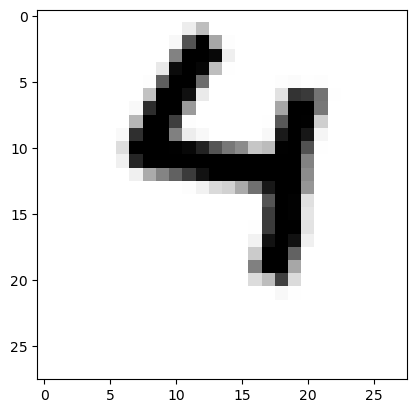

In [10]:
my_num = imread("static/img28.png")
my_num = 1.0 - my_num
plt.imshow(my_num, cmap='Greys')

1/1 [==============================] - 0s 120ms/step


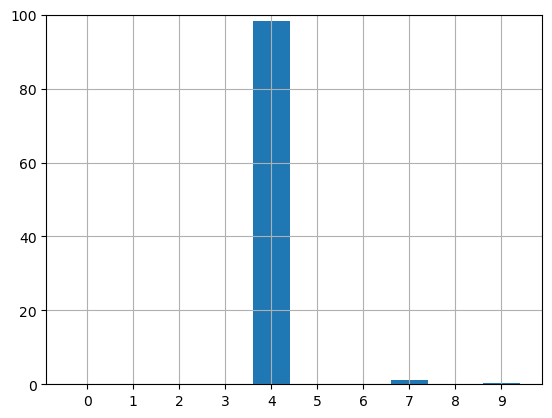

In [11]:
prediction = model.predict(np.reshape(my_num, (1, 28, 28)))
fg, ax = plt.subplots()
ax.bar([f'{j}' for j in range(10)], 100 * prediction.flatten())
ax.set_ylim(0, 100)
ax.grid()